In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Example 1

In [2]:
X = make_blobs(n_samples=50,n_features=2,centers=4)[0]
print(X.shape)

(50, 2)


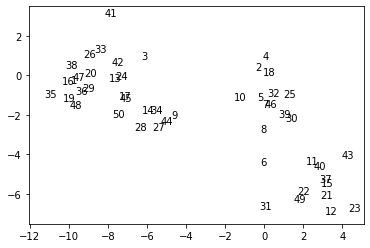

In [3]:
plt.figure()
plt.plot(X[:,0],X[:,1],'.',color='white')
for i in range((len(X))):
    plt.text(X[i,0],X[i,1],str(i+1))
plt.show()

### Hierarchical clustering

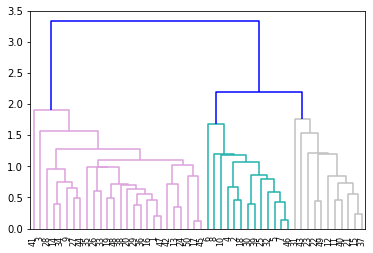

In [4]:
hierarchy.set_link_color_palette(['plum','lightseagreen', 'silver'])
Z = hierarchy.linkage(X)
#print(Z)
dn = hierarchy.dendrogram(Z,labels=np.arange(len(X))+1,color_threshold=2.0)
plt.show()

In [5]:
group = hierarchy.fcluster(Z,criterion='distance',t=2.0)
print(group)

[1 2 1 2 2 2 2 2 1 2 3 3 1 1 3 1 1 2 1 1 3 3 3 1 2 1 1 1 1 2 3 2 1 1 1 1 3
 1 2 3 1 1 3 1 1 2 1 1 3 1]


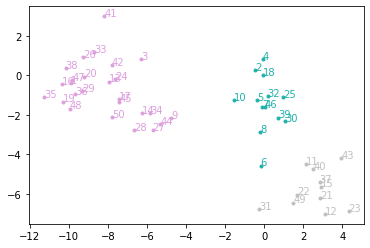

In [6]:
plt.figure()
plt.plot(X[group==1,0],X[group==1,1],'.',color='plum')
plt.plot(X[group==2,0],X[group==2,1],'.',color='lightseagreen')
plt.plot(X[group==3,0],X[group==3,1],'.',color='silver')
plt.plot(X[group==4,0],X[group==4,1],'.',color='red')
for i in range(len(X)):
    if group[i]==1: plt.text(X[i,0],X[i,1],str(i+1),color='plum')
    if group[i]==2: plt.text(X[i,0],X[i,1],str(i+1),color='lightseagreen')
    if group[i]==3: plt.text(X[i,0],X[i,1],str(i+1),color='silver')
    if group[i]==4: plt.text(X[i,0],X[i,1],str(i+1),color='red')
plt.show()

### k-Means

In [21]:
model = KMeans(n_clusters=3)
model.fit(X)
group = model.predict(X)
print(model.cluster_centers_)

[[-8.18565207 -0.74789938]
 [ 2.28452905 -5.70145123]
 [ 0.01459748 -1.18325007]]


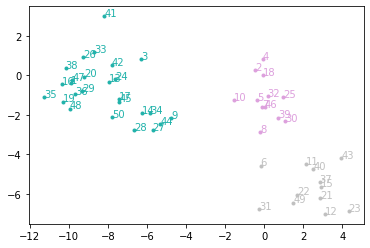

In [8]:
plt.figure()
plt.plot(X[group==0,0],X[group==0,1],'.',color='plum')
plt.plot(X[group==1,0],X[group==1,1],'.',color='lightseagreen')
plt.plot(X[group==2,0],X[group==2,1],'.',color='silver')
plt.plot(X[group==3,0],X[group==3,1],'.',color='red')
for i in range(len(X)):
    if group[i]==0: plt.text(X[i,0],X[i,1],str(i+1),color='plum')
    if group[i]==1: plt.text(X[i,0],X[i,1],str(i+1),color='lightseagreen')
    if group[i]==2: plt.text(X[i,0],X[i,1],str(i+1),color='silver')
    if group[i]==3: plt.text(X[i,0],X[i,1],str(i+1),color='red')
plt.show()

# Example 2

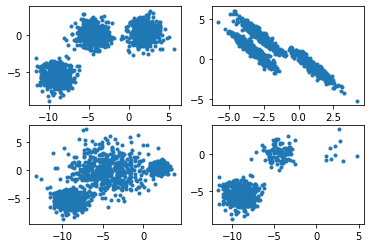

In [10]:
n_samples = 1500
random_state = 170
data1,y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
data2 = np.dot(data1, transformation) 
data3 = make_blobs(n_samples=n_samples,cluster_std=[1.0, 2.5, 0.5],random_state=random_state)[0]
data4 = np.vstack((data1[y == 0][:500], data1[y == 1][:100], data1[y == 2][:10]))

plt.figure()
plt.subplot(2,2,1)
plt.plot(data1[:,0],data1[:,1],'.')
plt.subplot(2,2,2)
plt.plot(data2[:,0],data2[:,1],'.')
plt.subplot(2,2,3)
plt.plot(data3[:,0],data3[:,1],'.')
plt.subplot(2,2,4)
plt.plot(data4[:,0],data4[:,1],'.')
plt.show()

In [13]:
g1 = KMeans(n_clusters=3).fit_predict(data1)
g2 = KMeans(n_clusters=3).fit_predict(data2)
g3 = KMeans(n_clusters=3).fit_predict(data3)
g4 = KMeans(n_clusters=3).fit_predict(data4)

[]

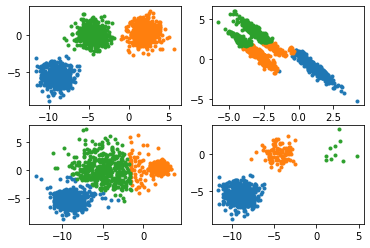

In [17]:
plt.figure()
plt.subplot(2,2,1)
plt.plot(data1[g1==0,0],data1[g1==0,1],'.')
plt.plot(data1[g1==1,0],data1[g1==1,1],'.')
plt.plot(data1[g1==2,0],data1[g1==2,1],'.')
plt.subplot(2,2,2)
plt.plot(data2[g2==0,0],data2[g2==0,1],'.')
plt.plot(data2[g2==1,0],data2[g2==1,1],'.')
plt.plot(data2[g2==2,0],data2[g2==2,1],'.')
plt.subplot(2,2,3)
plt.plot(data3[g3==0,0],data3[g3==0,1],'.')
plt.plot(data3[g3==1,0],data3[g3==1,1],'.')
plt.plot(data3[g3==2,0],data3[g3==2,1],'.')
plt.subplot(2,2,4)
plt.plot(data4[g4==0,0],data4[g4==0,1],'.')
plt.plot(data4[g4==1,0],data4[g4==1,1],'.')
plt.plot(data4[g4==2,0],data4[g4==2,1],'.')
plt.plot()

In [18]:
g1 = GaussianMixture(n_components=3).fit_predict(data1)
g2 = GaussianMixture(n_components=3).fit_predict(data2)
g3 = GaussianMixture(n_components=3).fit_predict(data3)
g4 = GaussianMixture(n_components=3).fit_predict(data4)

[]

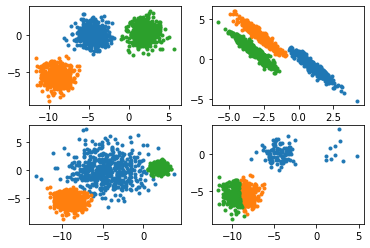

In [19]:
plt.figure()
plt.subplot(2,2,1)
plt.plot(data1[g1==0,0],data1[g1==0,1],'.')
plt.plot(data1[g1==1,0],data1[g1==1,1],'.')
plt.plot(data1[g1==2,0],data1[g1==2,1],'.')
plt.subplot(2,2,2)
plt.plot(data2[g2==0,0],data2[g2==0,1],'.')
plt.plot(data2[g2==1,0],data2[g2==1,1],'.')
plt.plot(data2[g2==2,0],data2[g2==2,1],'.')
plt.subplot(2,2,3)
plt.plot(data3[g3==0,0],data3[g3==0,1],'.')
plt.plot(data3[g3==1,0],data3[g3==1,1],'.')
plt.plot(data3[g3==2,0],data3[g3==2,1],'.')
plt.subplot(2,2,4)
plt.plot(data4[g4==0,0],data4[g4==0,1],'.')
plt.plot(data4[g4==1,0],data4[g4==1,1],'.')
plt.plot(data4[g4==2,0],data4[g4==2,1],'.')
plt.plot()